Getting started with colab

In [0]:
print("Hello World")

Hello World


seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day


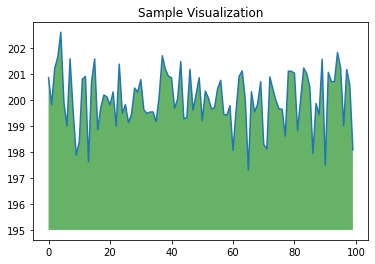

In [0]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()



---

# Uploading dataset and preprocessing

---




In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving presidential_polls.csv to presidential_polls.csv
User uploaded file "presidential_polls.csv" with length 3097615 bytes


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns # data visualization
import datetime

polls = pd.read_csv('../content/presidential_polls.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
polls

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,6.18,NaN,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,3.00,NaN,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,6.00,NaN,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,2.00,NaN,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,6.00,NaN,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Alabama,9/30/2016,10/13/2016,Ipsos,A-,341.0,lv,0.000000,38.30,53.84,NaN,NaN,37.30964,54.76821,NaN,NaN,NaN,http://reuters.com/statesofthenation/,46817,73263,10/15/16,14:57:58 1 Nov 2016
10232,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,9/30/2016,10/6/2016,Ipsos,A-,479.0,lv,0.000000,50.49,39.05,NaN,NaN,49.13094,39.41588,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46675,72969,10/10/16,14:57:58 1 Nov 2016
10233,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,9/16/2016,9/22/2016,Ipsos,A-,452.0,lv,0.000000,46.54,40.04,NaN,NaN,45.97130,39.97518,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46096,72088,9/26/16,14:57:58 1 Nov 2016
10234,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,North Carolina,6/20/2016,6/21/2016,Public Policy Polling,B+,947.0,v,0.000000,43.00,43.00,4.00,NaN,45.29390,46.66175,1.596946,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,44400,67363,6/23/16,14:57:58 1 Nov 2016


In [0]:
polls.shape


(10236, 27)

In [0]:
polls.head()


,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,6.18,NaN,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,3.00,NaN,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,6.00,NaN,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,2.00,NaN,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,6.00,NaN,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016


In [0]:
polls.describe()

,cycle,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id,question_id
count,10236.0,10233.000000,10236.000000,10236.000000,10236.000000,6480.000000,51.000000,10236.000000,10236.000000,6480.000000,51.000000,10236.000000,10236.000000
mean,2016.0,1115.791557,0.221769,41.717579,39.227002,7.713394,23.235294,43.024900,42.048617,4.804207,24.877707,45317.883060,70588.462485
std,0.0,2159.610968,0.535846,7.482747,7.648679,2.948387,7.278979,6.732445,6.707382,2.492364,5.710113,2871.251404,4677.283414
min,2016.0,35.000000,0.000000,11.040000,4.000000,0.000000,9.000000,16.419590,3.233949,-3.372429,13.973230,35362.000000,47244.000000
25%,2016.0,440.000000,0.000444,38.000000,34.877500,6.000000,20.000000,40.151210,37.973375,3.321973,21.407520,44850.750000,68747.000000
50%,2016.0,772.000000,0.008206,43.000000,39.000000,7.250000,26.000000,43.732560,42.034530,4.502154,26.093830,45925.500000,71773.500000
75%,2016.0,1225.000000,0.101939,46.000000,44.000000,9.000000,29.000000,46.507035,45.373782,5.855422,29.672160,47008.250000,73497.750000
max,2016.0,40816.000000,7.591351,88.000000,68.000000,25.000000,31.000000,86.699620,71.864600,19.277800,31.982120,48000.000000,75067.000000


Removing rows with null values for johnson

In [0]:
C_vs_T_vs_J_polls = polls.loc[polls.rawpoll_johnson.notnull()]

In [0]:
C_vs_T_vs_J_polls.head()


Segregating National and State polls

In [0]:
nat_C_vs_T_vs_J_polls = C_vs_T_vs_J_polls.loc[(C_vs_T_vs_J_polls.state == 'U.S.')]

In [6]:
state_C_vs_T_vs_J_polls = C_vs_T_vs_J_polls.loc[(C_vs_T_vs_J_polls.state != 'U.S.')]
state_C_vs_T_vs_J_polls

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.0,6.00,NaN,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.0,2.00,NaN,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
7,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Pennsylvania,10/25/2016,10/30/2016,Gravis Marketing,B-,3217.0,rv,3.217750,47.00,44.0,3.00,NaN,46.89049,43.50333,3.466432,NaN,NaN,http://www.breitbart.com/2016-presidential-rac...,47867,74909,10/31/16,15:09:38 1 Nov 2016
11,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/25/2016,10/27/2016,Siena College,A,815.0,lv,2.755075,42.00,46.0,4.00,NaN,41.81832,47.92262,2.676897,NaN,NaN,http://www.nytimes.com/interactive/2016/10/30/...,47771,74761,10/30/16,15:09:38 1 Nov 2016
12,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,California,10/14/2016,10/23/2016,Public Policy Institute of California,A,1024.0,lv,2.739877,54.00,28.0,5.00,NaN,55.68839,29.50605,3.170510,NaN,NaN,http://www.ppic.org/content/pubs/survey/S_1016...,47545,74374,10/27/16,15:09:38 1 Nov 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10225,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Utah,8/10/2016,8/16/2016,Google Consumer Surveys,B,259.0,lv,0.000000,22.75,27.5,13.75,NaN,29.94538,36.82408,9.741756,NaN,NaN,https://drive.google.com/drive/u/0/folders/0B2...,45634,71019,9/9/16,14:57:58 1 Nov 2016
10227,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Florida,8/4/2016,8/10/2016,Marist College,A,862.0,rv,0.000000,41.00,36.0,9.00,NaN,42.62525,42.01089,3.671217,NaN,NaN,http://www.nbcnews.com/politics/2016-election/...,44837,68701,8/12/16,14:57:58 1 Nov 2016
10229,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Utah,7/18/2016,8/4/2016,Dan Jones & Associates,C+,858.0,lv,0.000000,25.00,37.0,16.00,NaN,26.74404,40.16534,12.889780,NaN,NaN,http://utahpolicy.com/index.php/features/today...,44788,68584,8/8/16,14:57:58 1 Nov 2016
10230,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Ohio,6/30/2016,7/11/2016,Quinnipiac University,A-,955.0,rv,0.000000,36.00,37.0,7.00,NaN,40.33774,41.56030,2.872088,NaN,NaN,http://www.qu.edu/news-and-events/quinnipiac-u...,44566,67906,7/13/16,14:57:58 1 Nov 2016




---


# National Poll Averages

---





National polling  raw average for Clinton



**bold text**



In [0]:
nat_Clinton_raw_avg = nat_C_vs_T_vs_J_polls.groupby('createddate').apply(lambda dfx: (dfx["rawpoll_clinton"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
nat_Clinton_raw_avg = pd.DataFrame(data = nat_Clinton_raw_avg, columns = ['poll_raw_avg_clinton'])

nat_Clinton_adj_avg = nat_C_vs_T_vs_J_polls.groupby('createddate').apply(lambda dfx: (dfx["adjpoll_clinton"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
nat_Clinton_adj_avg = pd.DataFrame(data = nat_Clinton_adj_avg, columns = ['poll_adj_avg_clinton'])

In [16]:
nat_Clinton_raw_avg

,poll_raw_avg_clinton
createddate,
10/10/16,42.681135
10/11/16,45.237879
10/12/16,42.527649
10/13/16,44.929334
10/14/16,45.357671
...,...
9/29/16,43.986118
9/30/16,43.503629
9/6/16,43.158612


In [17]:
nat_Clinton_adj_avg


,poll_adj_avg_clinton
createddate,
10/10/16,45.175451
10/11/16,45.014544
10/12/16,43.403645
10/13/16,45.946903
10/14/16,45.563147
...,...
9/29/16,44.659865
9/30/16,45.413566
9/6/16,44.944669



National polling raw average for Trump

In [0]:
nat_Trump_raw_avg = nat_C_vs_T_vs_J_polls.groupby('createddate').apply(lambda dfx: (dfx["rawpoll_trump"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
nat_Trump_raw_avg = pd.DataFrame(data = nat_Trump_raw_avg, columns = ['poll_raw_avg_trump'])

nat_Trump_adj_avg = nat_C_vs_T_vs_J_polls.groupby('createddate').apply(lambda dfx: (dfx["adjpoll_trump"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
nat_Trump_adj_avg = pd.DataFrame(data = nat_Trump_adj_avg, columns = ['poll_adj_avg_Trump'])

National polling raw average for Johnson

In [0]:
nat_Johnson_raw_avg = nat_C_vs_T_vs_J_polls.groupby('createddate').apply(lambda dfx: (dfx["rawpoll_johnson"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
nat_Johnson_raw_avg = pd.DataFrame(data = nat_Johnson_raw_avg, columns = ['poll_raw_avg_johnson'])

nat_Johnson_adj_avg = nat_C_vs_T_vs_J_polls.groupby('createddate').apply(lambda dfx: (dfx["adjpoll_johnson"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
nat_Johnson_adj_avg = pd.DataFrame(data = nat_Johnson_adj_avg, columns = ['poll_adj_avg_Johnson'])

Concatenating the three National results

In [20]:
nat_all_avg = pd.concat([nat_Clinton_raw_avg, nat_Clinton_adj_avg, nat_Trump_raw_avg, nat_Trump_adj_avg, nat_Johnson_raw_avg, nat_Johnson_adj_avg], axis=1)
nat_all_avg.reset_index(level=0, inplace=True)
nat_all_avg

,createddate,poll_raw_avg_clinton,poll_adj_avg_clinton,poll_raw_avg_trump,poll_adj_avg_Trump,poll_raw_avg_johnson,poll_adj_avg_Johnson
0,10/10/16,42.681135,45.175451,35.777082,41.122467,6.823034,4.015951
1,10/11/16,45.237879,45.014544,37.113982,40.468090,7.741956,5.048771
2,10/12/16,42.527649,43.403645,35.568449,39.564195,7.529090,4.870701
3,10/13/16,44.929334,45.946903,38.072506,40.692584,6.983551,4.818314
4,10/14/16,45.357671,45.563147,38.571942,41.595881,8.667715,5.503386
...,...,...,...,...,...,...,...
108,9/29/16,43.986118,44.659865,40.006941,41.726406,6.006941,4.343074
109,9/30/16,43.503629,45.413566,40.293576,42.492237,7.288262,4.565872
110,9/6/16,43.158612,44.944669,43.033674,44.349725,7.513726,3.734559
111,9/7/16,41.687329,44.283837,39.691459,42.867741,10.439199,6.051636


Visualizing the results

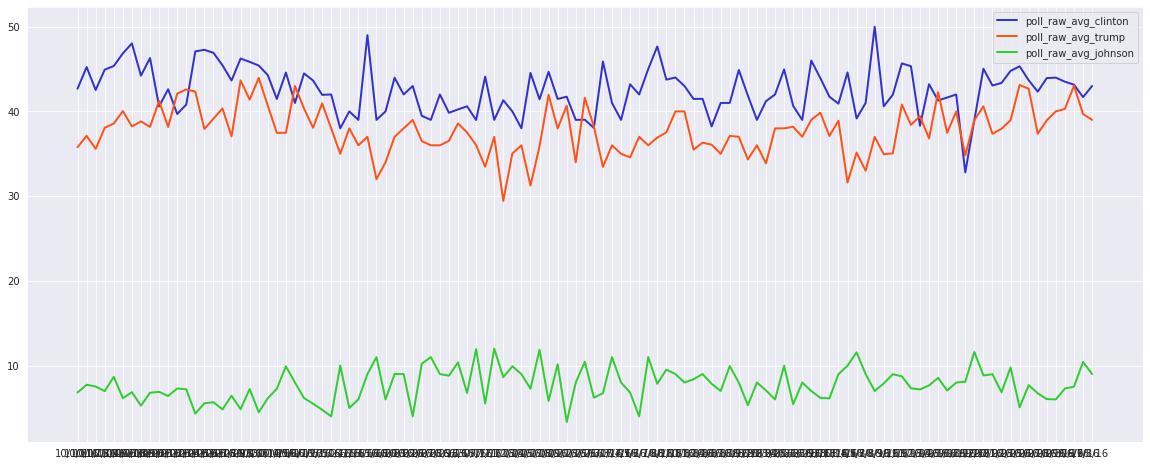

In [21]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
plt.plot('createddate', 'poll_raw_avg_clinton', data=nat_all_avg, marker='', color='#3333cc', linewidth=2)
plt.plot('createddate', 'poll_raw_avg_trump', data=nat_all_avg, marker='', color='#ff531a', linewidth=2)
plt.plot('createddate', 'poll_raw_avg_johnson', data=nat_all_avg, marker='', color='#33cc33', linewidth=2)
plt.legend()


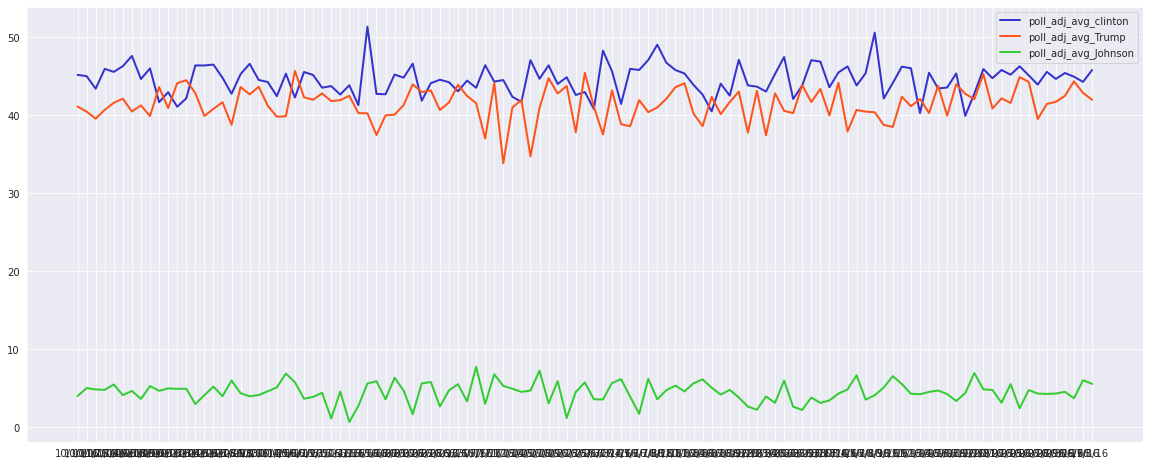

In [22]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
plt.plot('createddate', 'poll_adj_avg_clinton', data=nat_all_avg, marker='', color='#3333cc', linewidth=2)
plt.plot('createddate', 'poll_adj_avg_Trump', data=nat_all_avg, marker='', color='#ff531a', linewidth=2)
plt.plot('createddate', 'poll_adj_avg_Johnson', data=nat_all_avg, marker='', color='#33cc33', linewidth=2)
plt.legend()

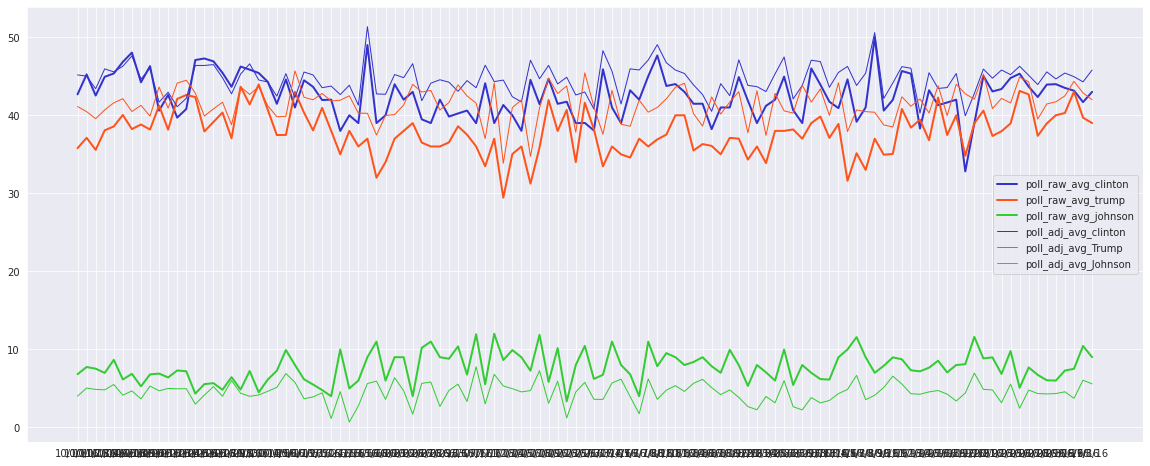

In [23]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
plt.plot('createddate', 'poll_raw_avg_clinton', data=nat_all_avg, marker='', color='#3333cc', linewidth=2)
plt.plot('createddate', 'poll_raw_avg_trump', data=nat_all_avg, marker='', color='#ff531a', linewidth=2)
plt.plot('createddate', 'poll_raw_avg_johnson', data=nat_all_avg, marker='', color='#33cc33', linewidth=2)
plt.plot('createddate', 'poll_adj_avg_clinton', data=nat_all_avg, marker='', color='#3333cc', linewidth=1)
plt.plot('createddate', 'poll_adj_avg_Trump', data=nat_all_avg, marker='', color='#ff531a', linewidth=1)
plt.plot('createddate', 'poll_adj_avg_Johnson', data=nat_all_avg, marker='', color='#33cc33', linewidth=1)
plt.legend()



---
Smoothening the curve by converting it into weekly


---





In [24]:
weekly_nat_all_avg = nat_all_avg
weekly_nat_all_avg['createddate'] = weekly_nat_all_avg['createddate'].astype('datetime64[ns]')
weekly_nat_all_avg['date_minus_time'] = weekly_nat_all_avg["createddate"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day)) 
weekly_nat_all_avg.set_index(weekly_nat_all_avg["date_minus_time"],inplace=True)
weekly_nat_all_avg

,createddate,poll_raw_avg_clinton,poll_adj_avg_clinton,poll_raw_avg_trump,poll_adj_avg_Trump,poll_raw_avg_johnson,poll_adj_avg_Johnson,date_minus_time
date_minus_time,,,,,,,,
2016-10-10,2016-10-10,42.681135,45.175451,35.777082,41.122467,6.823034,4.015951,2016-10-10
2016-10-11,2016-10-11,45.237879,45.014544,37.113982,40.468090,7.741956,5.048771,2016-10-11
2016-10-12,2016-10-12,42.527649,43.403645,35.568449,39.564195,7.529090,4.870701,2016-10-12
2016-10-13,2016-10-13,44.929334,45.946903,38.072506,40.692584,6.983551,4.818314,2016-10-13
2016-10-14,2016-10-14,45.357671,45.563147,38.571942,41.595881,8.667715,5.503386,2016-10-14
...,...,...,...,...,...,...,...,...
2016-09-29,2016-09-29,43.986118,44.659865,40.006941,41.726406,6.006941,4.343074,2016-09-29
2016-09-30,2016-09-30,43.503629,45.413566,40.293576,42.492237,7.288262,4.565872,2016-09-30
2016-09-06,2016-09-06,43.158612,44.944669,43.033674,44.349725,7.513726,3.734559,2016-09-06


In [25]:
clinton_weekly_raw_polls = weekly_nat_all_avg['poll_raw_avg_clinton'].resample('W').mean()
clinton_weekly_raw_polls = pd.DataFrame(data = clinton_weekly_raw_polls, columns = ['poll_raw_avg_clinton'])

trump_weekly_raw_polls = weekly_nat_all_avg['poll_raw_avg_trump'].resample('W').mean()
trump_weekly_raw_polls = pd.DataFrame(data = trump_weekly_raw_polls, columns = ['poll_raw_avg_trump'])

johnson_weekly_raw_polls = weekly_nat_all_avg['poll_raw_avg_johnson'].resample('W').mean()
johnson_weekly_raw_polls = pd.DataFrame(data = johnson_weekly_raw_polls, columns = ['poll_raw_avg_johnson'])

clinton_weekly_adj_polls = weekly_nat_all_avg['poll_adj_avg_clinton'].resample('W').mean()
clinton_weekly_adj_polls = pd.DataFrame(data = clinton_weekly_adj_polls, columns = ['poll_adj_avg_clinton'])

trump_weekly_adj_polls = weekly_nat_all_avg['poll_adj_avg_Trump'].resample('W').mean()
trump_weekly_adj_polls = pd.DataFrame(data = trump_weekly_adj_polls, columns = ['poll_adj_avg_Trump'])

johnson_weekly_adj_polls = weekly_nat_all_avg['poll_adj_avg_Johnson'].resample('W').mean()
johnson_weekly_adj_polls = pd.DataFrame(data = johnson_weekly_adj_polls, columns = ['poll_adj_avg_Johnson'])

weekly_nat_polls = pd.concat([clinton_weekly_raw_polls, trump_weekly_raw_polls, johnson_weekly_raw_polls, clinton_weekly_adj_polls, trump_weekly_adj_polls, johnson_weekly_adj_polls], axis=1)
weekly_nat_polls.reset_index(level=0, inplace=True)

weekly_nat_polls

,date_minus_time,poll_raw_avg_clinton,poll_raw_avg_trump,poll_raw_avg_johnson,poll_adj_avg_clinton,poll_adj_avg_Trump,poll_adj_avg_Johnson
0,2016-05-15,42.000000,38.000000,4.000000,43.738819,41.822627,1.147361
1,2016-05-22,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-05-29,38.000000,35.000000,10.000000,42.655674,41.932841,4.595336
3,2016-06-05,40.116392,38.296145,7.692389,43.461619,43.200343,3.119134
4,2016-06-12,38.985857,36.014344,11.943278,43.526218,41.565053,7.777288
5,2016-06-19,41.750000,34.749515,8.000647,44.519375,39.495784,4.477750
6,2016-06-26,42.114730,37.625528,8.053450,44.630351,42.083778,4.607344
7,2016-07-03,41.109809,35.901150,8.218524,44.753290,40.997467,3.918343
8,2016-07-10,43.373297,35.897827,7.532126,45.865304,40.158480,4.343831
9,2016-07-17,40.715726,34.096989,9.779393,44.109036,39.440147,5.607290


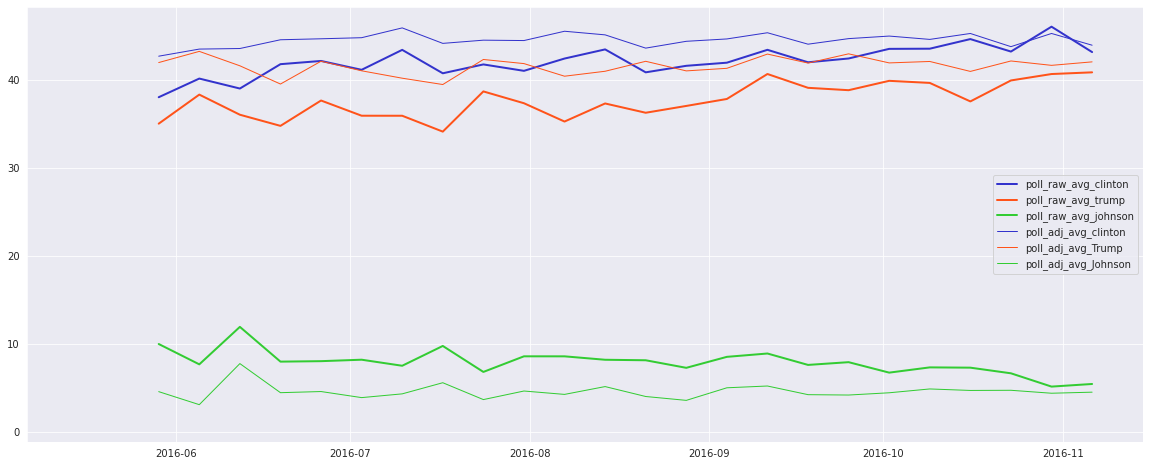

In [26]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
plt.plot('date_minus_time', 'poll_raw_avg_clinton', data=weekly_nat_polls, marker='', color='#3333cc', linewidth=2)
plt.plot('date_minus_time', 'poll_raw_avg_trump', data=weekly_nat_polls, marker='', color='#ff531a', linewidth=2)
plt.plot('date_minus_time', 'poll_raw_avg_johnson', data=weekly_nat_polls, marker='', color='#33cc33', linewidth=2)
plt.plot('date_minus_time', 'poll_adj_avg_clinton', data=weekly_nat_polls, marker='', color='#3333cc', linewidth=1)
plt.plot('date_minus_time', 'poll_adj_avg_Trump', data=weekly_nat_polls, marker='', color='#ff531a', linewidth=1)
plt.plot('date_minus_time', 'poll_adj_avg_Johnson', data=weekly_nat_polls, marker='', color='#33cc33', linewidth=1)
plt.legend()

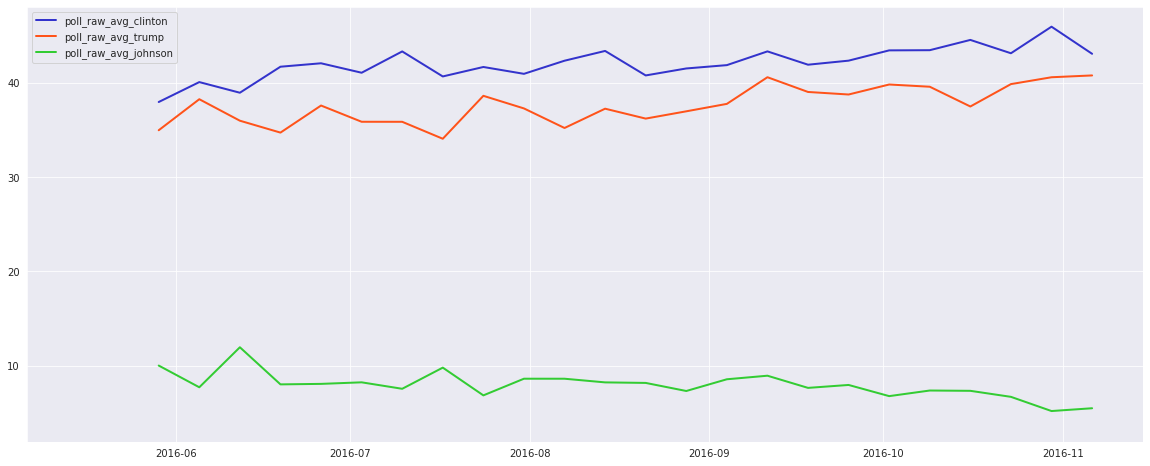

In [27]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
plt.plot('date_minus_time', 'poll_raw_avg_clinton', data=weekly_nat_polls, marker='', color='#3333cc', linewidth=2)
plt.plot('date_minus_time', 'poll_raw_avg_trump', data=weekly_nat_polls, marker='', color='#ff531a', linewidth=2)
plt.plot('date_minus_time', 'poll_raw_avg_johnson', data=weekly_nat_polls, marker='', color='#33cc33', linewidth=2)

plt.legend()

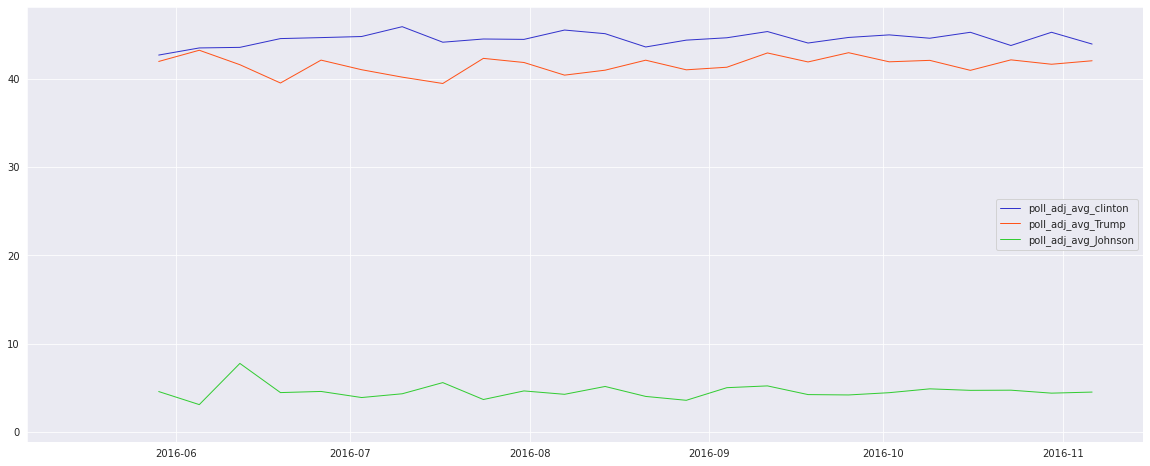

In [28]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))

plt.plot('date_minus_time', 'poll_adj_avg_clinton', data=weekly_nat_polls, marker='', color='#3333cc', linewidth=1)
plt.plot('date_minus_time', 'poll_adj_avg_Trump', data=weekly_nat_polls, marker='', color='#ff531a', linewidth=1)
plt.plot('date_minus_time', 'poll_adj_avg_Johnson', data=weekly_nat_polls, marker='', color='#33cc33', linewidth=1)
plt.legend()

In [0]:
from google.colab import files
nat_all_avg.to_csv('nat_all_avg.csv')
files.download('nat_all_avg.csv')



---


# State Polls Averages

---


In [9]:
state_Clinton_raw_avg = state_C_vs_T_vs_J_polls.groupby(['createddate', 'state']).apply(lambda dfx: (dfx["rawpoll_clinton"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
state_Clinton_raw_avg = pd.DataFrame(data = state_Clinton_raw_avg, columns = ['poll_raw_avg_clinton'])

state_Clinton_adj_avg = state_C_vs_T_vs_J_polls.groupby(['createddate', 'state']).apply(lambda dfx: (dfx["adjpoll_clinton"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
state_Clinton_adj_avg = pd.DataFrame(data = state_Clinton_adj_avg, columns = ['poll_adj_avg_clinton'])

state_Clinton_raw_avg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


poll_raw_avg_clinton
createddate state                              
10/1/16     Nevada                    45.000000
10/10/16    Alabama                   22.510000
            Alaska                    29.970000
            Arizona                   38.240000
            Arkansas                  34.690000
...                                         ...
9/9/16      Virginia                  37.262301
            Washington                41.656982
            West Virginia             23.968076
            Wisconsin                 41.077215
            Wyoming                   22.783312

[1189 rows x 1 columns]

Trump state averages

In [10]:
state_Trump_raw_avg = state_C_vs_T_vs_J_polls.groupby(['createddate', 'state']).apply(lambda dfx: (dfx["rawpoll_trump"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
state_Trump_raw_avg = pd.DataFrame(data = state_Trump_raw_avg, columns = ['poll_raw_avg_trump'])

state_Trump_adj_avg = state_C_vs_T_vs_J_polls.groupby(['createddate', 'state']).apply(lambda dfx: (dfx["adjpoll_trump"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
state_Trump_adj_avg = pd.DataFrame(data = state_Trump_adj_avg, columns = ['poll_adj_avg_Trump'])
state_Trump_adj_avg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


poll_adj_avg_Trump
createddate state                            
10/1/16     Nevada                  46.567790
10/10/16    Alabama                 61.530999
            Alaska                  35.476596
            Arizona                 44.020755
            Arkansas                48.255784
...                                       ...
9/9/16      Virginia                37.748887
            Washington              34.979167
            West Virginia           57.577015
            Wisconsin               36.873366
            Wyoming                 52.884444

[1189 rows x 1 columns]

Johnson state averages

In [11]:
state_Johnson_raw_avg = state_C_vs_T_vs_J_polls.groupby(['createddate', 'state']).apply(lambda dfx: (dfx["rawpoll_johnson"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
state_Johnson_raw_avg = pd.DataFrame(data = state_Johnson_raw_avg, columns = ['poll_raw_avg_johnson'])

state_Johnson_adj_avg = state_C_vs_T_vs_J_polls.groupby(['createddate', 'state']).apply(lambda dfx: (dfx["adjpoll_johnson"] * dfx["poll_wt"]).sum() / dfx["poll_wt"].sum())
state_Johnson_adj_avg = pd.DataFrame(data = state_Johnson_adj_avg, columns = ['poll_adj_avg_Johnson'])

state_Johnson_adj_avg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


poll_adj_avg_Johnson
createddate state                              
10/1/16     Nevada                     2.465833
10/10/16    Alabama                    1.582296
            Alaska                    14.512297
            Arizona                    3.922277
            Arkansas                   0.262296
...                                         ...
9/9/16      Virginia                   7.285783
            Washington                 5.462837
            West Virginia              3.198583
            Wisconsin                  4.101446
            Wyoming                    6.430557

[1189 rows x 1 columns]

Concatenating the three

In [12]:
state_all_avg = pd.concat([state_Clinton_raw_avg, state_Clinton_adj_avg, state_Trump_raw_avg, state_Trump_adj_avg, state_Johnson_raw_avg, state_Johnson_adj_avg], axis=1)
state_all_avg.reset_index(level=0, inplace=True)
state_all_avg

,createddate,poll_raw_avg_clinton,poll_adj_avg_clinton,poll_raw_avg_trump,poll_adj_avg_Trump,poll_raw_avg_johnson,poll_adj_avg_Johnson
state,,,,,,,
Nevada,10/1/16,45.000000,45.186577,44.000000,46.567790,5.000000,2.465833
Alabama,10/10/16,22.510000,27.944879,53.800000,61.530999,4.170000,1.582296
Alaska,10/10/16,29.970000,35.490905,27.170000,35.476596,17.100000,14.512297
Arizona,10/10/16,38.240000,43.737876,35.870000,44.020755,6.510000,3.922277
Arkansas,10/10/16,34.690000,40.167438,40.240000,48.255784,2.850000,0.262296
...,...,...,...,...,...,...,...
Virginia,9/9/16,37.262301,44.452043,29.072202,37.748887,11.376309,7.285783
Washington,9/9/16,41.656982,49.114999,25.905615,34.979167,9.554432,5.462837
West Virginia,9/9/16,23.968076,31.287566,48.669935,57.577015,7.288873,3.198583


Visualizing the state averages

In [0]:
from google.colab import files
state_all_avg.to_csv('state_all_avg.csv')
files.download('state_all_avg.csv')
